In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

sns.set_style('darkgrid')

font = {'size': 18}
matplotlib.rc('font', **font)

In [2]:
df = pd.read_pickle("data/train_full.pkl")

In [3]:
pd.__version__

'1.3.4'

In [4]:
df.head()

,title,selftext,num_user_comments,median_user_comment_score,max_user_comment_score,median_user_submission_score,max_user_submission_score,title_length,selftext_length,account_age_in_days,minutes_into_day,weekday,ismorning,isweekend,score,num_comments,virality_score,is_viral
0,Refinance my home to free up VA loan or wait?,First let me say thank you for looking at my p...,94,1.0,1871.0,3.0,25906.0,45,1119,1711,680,0,False,False,1,2,0.199978,False
1,Thank you for being such a great resource; you...,[removed],0,0.0,0.0,6.0,4888.0,82,9,4030,68,0,False,False,1,2,0.199978,False
2,"401k vs 457b, not sure which to max first",My work has both the 401k and 457b plans. They...,0,0.0,0.0,0.0,0.0,41,576,4209,770,5,False,True,3,7,0.674514,False
3,"Student Loans, Interest Rate, and Payment Stra...",I'll be attending graduate school soon. Tuitio...,0,0.0,0.0,2.0,490.0,59,381,1300,764,1,False,False,2,2,0.250797,False
4,What do I put under Gross Income when applying...,I'm applying for a Discover Secured Credit Car...,29,1.0,3.0,1.5,42.0,64,335,309,1287,3,False,False,0,15,1.118697,False


In [5]:
y = df.is_viral.copy()

In [6]:
print("y takes on the values 0 and 1", np.unique(y))
print("with a", np.unique(y, return_counts=True)[1]/len(y), "split.")

y takes on the values 0 and 1 [False  True]
with a [0.91232662 0.08767338] split.


In [7]:
df.keys()

Index(['title', 'selftext', 'num_user_comments', 'median_user_comment_score',
       'max_user_comment_score', 'median_user_submission_score',
       'max_user_submission_score', 'title_length', 'selftext_length',
       'account_age_in_days', 'minutes_into_day', 'weekday', 'ismorning',
       'isweekend', 'score', 'num_comments', 'virality_score', 'is_viral'],
      dtype='object')

In [8]:
features = ['num_user_comments', 'median_user_comment_score',
       'max_user_comment_score', 'median_user_submission_score',
       'max_user_submission_score', 'title_length', 'selftext_length',
       'account_age_in_days', 'minutes_into_day', 'weekday']

In [9]:
X = df[features]

In [10]:
X

,num_user_comments,median_user_comment_score,max_user_comment_score,median_user_submission_score,max_user_submission_score,title_length,selftext_length,account_age_in_days,minutes_into_day,weekday
0,94,1.0,1871.0,3.0,25906.0,45,1119,1711,680,0
1,0,0.0,0.0,6.0,4888.0,82,9,4030,68,0
2,0,0.0,0.0,0.0,0.0,41,576,4209,770,5
3,0,0.0,0.0,2.0,490.0,59,381,1300,764,1
4,29,1.0,3.0,1.5,42.0,64,335,309,1287,3
...,...,...,...,...,...,...,...,...,...,...
124936,0,0.0,0.0,19.0,2234.0,21,609,2308,1032,2
124937,0,0.0,0.0,3.0,3.0,51,9,848,1073,4
124938,62,2.0,182.0,3.0,1689.0,79,1209,3050,1140,4
124939,11,1.0,5.0,3.0,120.0,72,9,1257,553,4


 Logistic regression models

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X.copy(),y,
                                                       shuffle=True,
                                                       random_state=214,
                                                       stratify=y,
                                                       test_size=.2)

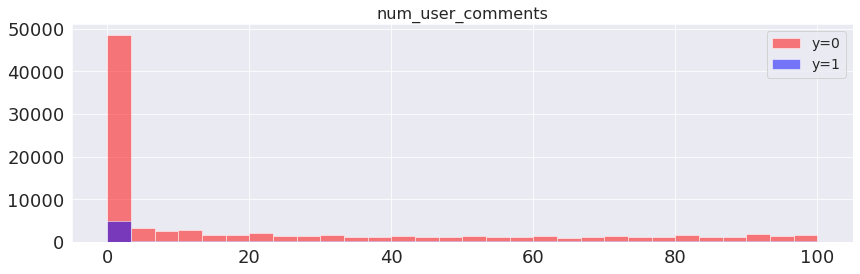

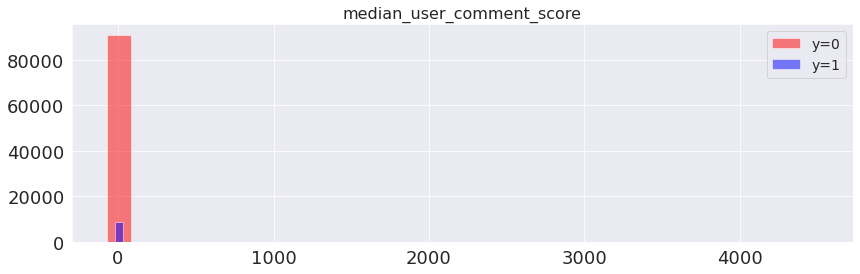

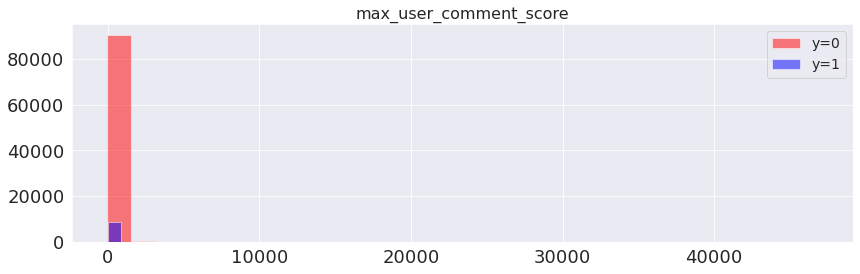

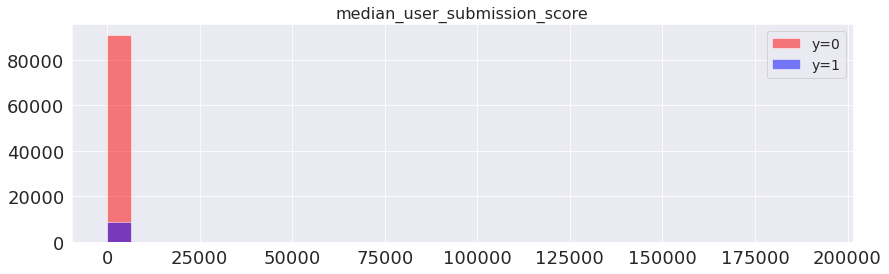

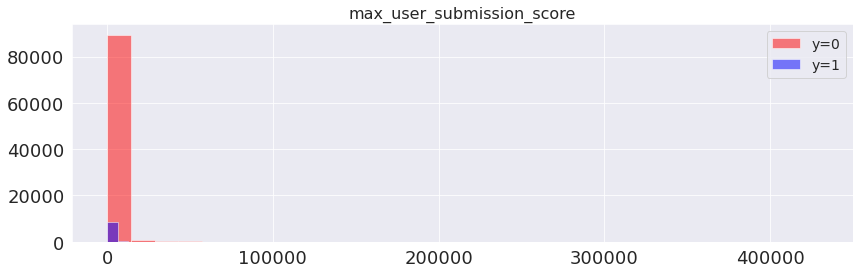

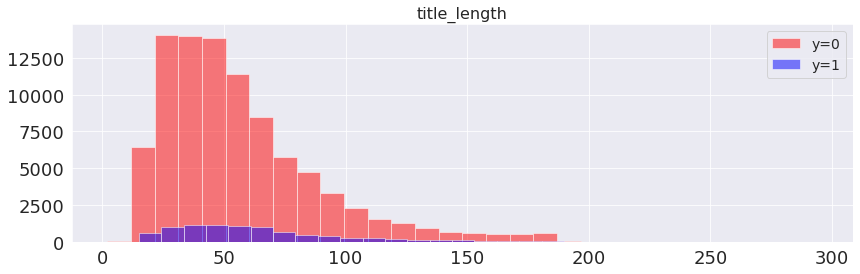

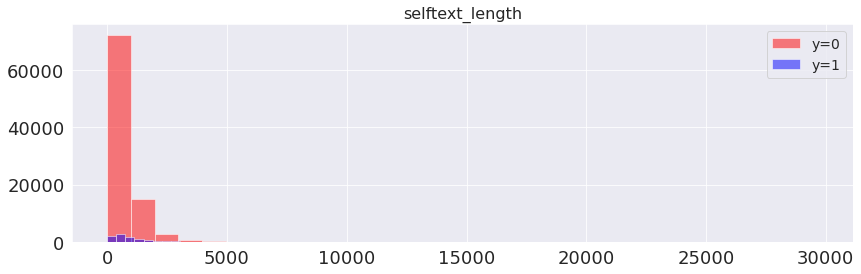

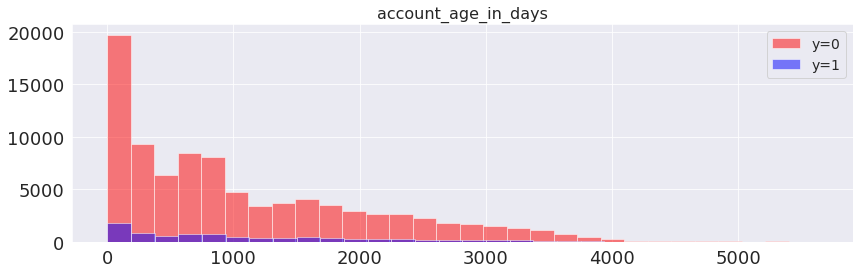

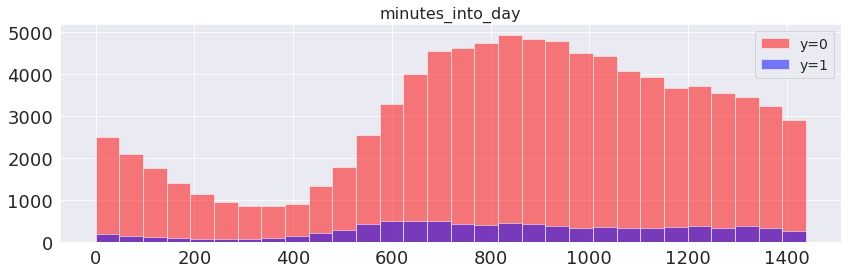

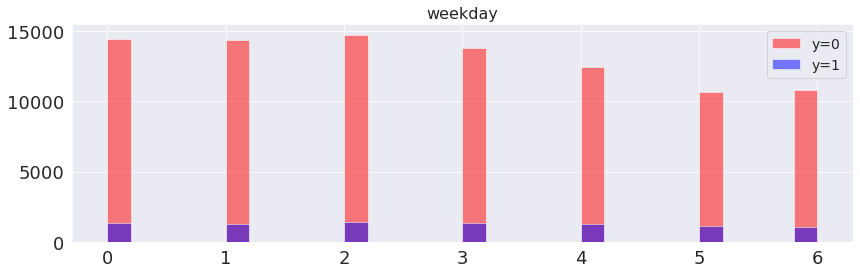

In [13]:
## histograms
for column in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.hist(X_train.loc[y_train==0, column], color='r', alpha=.5, label="y=0", bins=30)
    plt.hist(X_train.loc[y_train==1, column], color='b', alpha=.5, label="y=1", bins=30)
    plt.legend(fontsize=14)
    plt.title(column,fontsize=16)
    plt.show()

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [15]:
kfold = StratifiedKFold(5, shuffle=True, random_state=14235)

log_reg_cv_aucs = np.zeros((5, len(X_train.columns)))

log_reg = LogisticRegression()

i = 0
for train_index, test_index in kfold.split(X_train, y_train):
    X_train_train = X_train.iloc[train_index]
    X_holdout = X_train.iloc[test_index]
    y_train_train = y_train.iloc[train_index]
    y_holdout = y_train.iloc[test_index]
    j = 0
    for c in X_train.columns:
        log_reg_clone = clone(log_reg)
        log_reg_clone.fit(X_train_train[c].values.reshape(-1,1), y_train_train)
        log_reg_cv_aucs[i,j] = roc_auc_score(y_holdout, log_reg_clone.predict(X_holdout[c].values.reshape(-1,1)))
        j = j + 1
    i = i + 1

In [16]:
print("The feature with the highest avg. cv ROC AUC was",
          X_train.columns[np.argmax(np.mean(log_reg_cv_aucs, axis=0))])
print("This feature produced a model with avg. cv. ROC AUC of",np.round(np.max(np.mean(log_reg_cv_aucs, axis=0)),4))

The feature with the highest avg. cv ROC AUC was selftext_length
This feature produced a model with avg. cv. ROC AUC of 0.5005


Dimensionality Reduction

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [18]:
scaler = StandardScaler()
pca = PCA(2)

X_train_scaled = scaler.fit_transform(X_train)
X_train_PCA = pca.fit_transform(X_train_scaled)

In [19]:
X_train_PCA[y_train==0,0]

array([ 0.09880822,  1.11096876,  1.60213708, ..., -0.43875111,
       -0.36326626,  1.5752637 ])

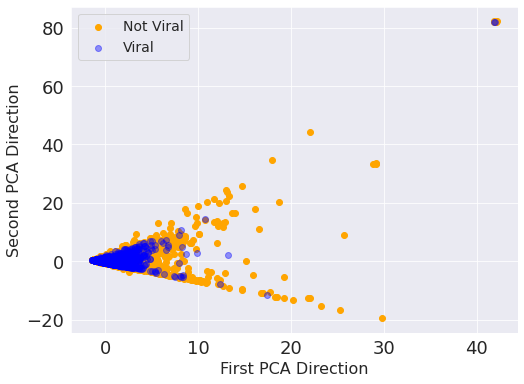

In [20]:
plt.figure(figsize=(8,6))

plt.scatter(X_train_PCA[y_train==0,0], 
            X_train_PCA[y_train==0,1], 
            c='orange', 
            label='Not Viral')
plt.scatter(X_train_PCA[y_train==1,0], 
            X_train_PCA[y_train==1,1], 
            c='blue', 
            label='Viral',
            alpha=.4)

plt.legend(fontsize=14)

plt.xlabel("First PCA Direction", fontsize=16)
plt.ylabel("Second PCA Direction", fontsize=16)

plt.show()

Analyzing PCA output 



In [21]:
comp_df = pd.DataFrame(pca.components_.transpose(),
                        columns = ['component_1', 'component_2'],
                        index = X_train.columns)

In [22]:
print("Sorted according to component 1")
print(comp_df.component_1.sort_values())
print()

print("Sorted according to component 2")
print(comp_df.component_2.sort_values())

Sorted according to component 1
weekday                        -0.039373
minutes_into_day                0.023777
selftext_length                 0.085323
median_user_comment_score       0.099412
title_length                    0.148834
median_user_submission_score    0.292939
max_user_comment_score          0.353185
max_user_submission_score       0.450883
num_user_comments               0.506042
account_age_in_days             0.537255
Name: component_1, dtype: float64

Sorted according to component 2
num_user_comments              -0.404272
account_age_in_days            -0.264966
max_user_comment_score         -0.226234
selftext_length                -0.094376
median_user_comment_score      -0.023111
minutes_into_day               -0.007294
weekday                         0.018567
title_length                    0.058942
max_user_submission_score       0.531354
median_user_submission_score    0.647707
Name: component_2, dtype: float64


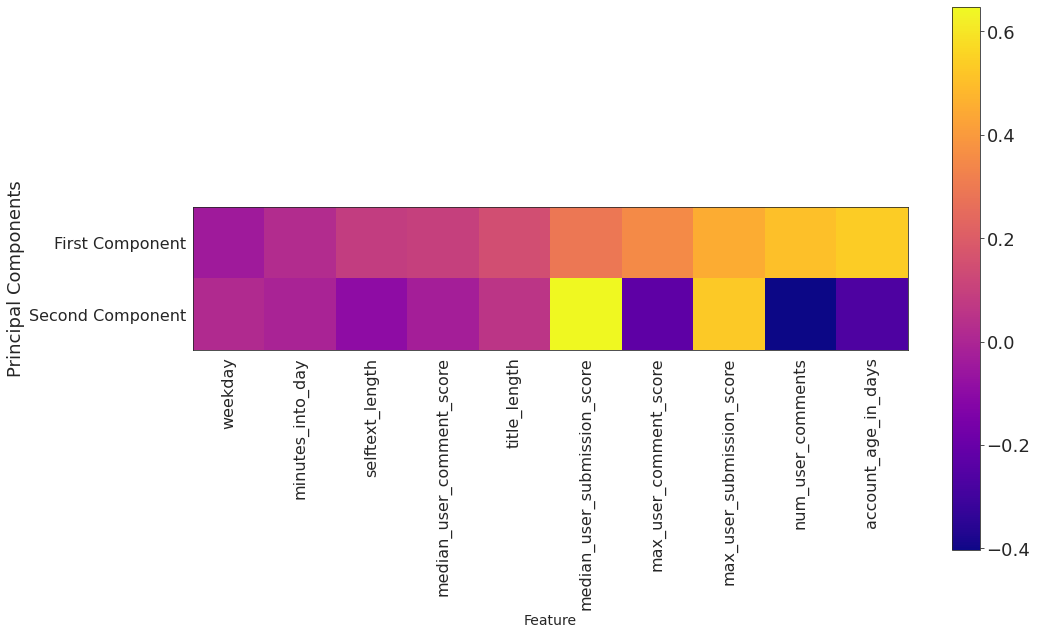

In [23]:
sns.set_style("white")

plt.figure(figsize=(16,10))

plt.imshow(comp_df.sort_values('component_1').values.transpose(), cmap = 'plasma')

plt.yticks([0,1], ["First Component", "Second Component"],
          fontsize = 16)

plt.colorbar()

plt.xticks(range(10),
          comp_df.sort_values('component_1').index, rotation = 90, 
          fontsize = 16)

plt.xlabel("Feature", fontsize = 14)
plt.ylabel("Principal Components", fontsize = 18)

plt.show()

In [24]:
pca = PCA(n_components=10)

pca.fit(X_train_scaled)

PCA(n_components=10)

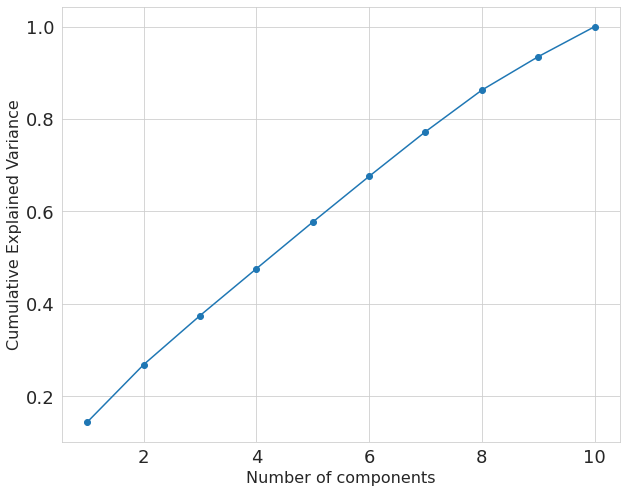

In [25]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))

plt.plot(range(1, 11), 
         np.cumsum(pca.explained_variance_ratio_),
        '-o')

plt.xlabel("Number of components", fontsize=16)
plt.ylabel("Cumulative Explained Variance", fontsize=16)

plt.show()

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [27]:
pipe = Pipeline([('scale', StandardScaler()),
                    ('pca', PCA(2)),
                    ('svc', SVC(kernel='linear',max_iter=100000, probability=True))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=2)),
                ('svc',
                 SVC(kernel='linear', max_iter=100000, probability=True))])

In [28]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

Training Accuracy 0.9123279174003521


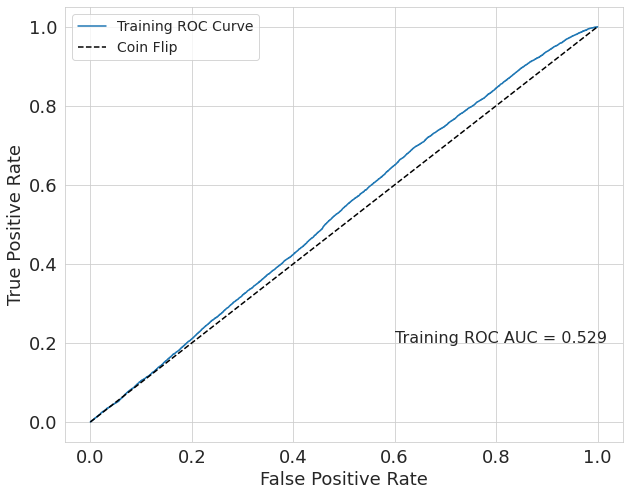

In [29]:
print("Training Accuracy", accuracy_score(y_train, pipe.predict(X_train)))

fprs,tprs,threshs = roc_curve(y_train, pipe.predict_proba(X_train)[:,1])

plt.figure(figsize=(10,8))

plt.plot(fprs, tprs, label='Training ROC Curve')
plt.plot([0,1], [0,1], 'k--', label="Coin Flip")
plt.text(.6,.2,
         "Training ROC AUC = "+ str(np.round(roc_auc_score(y_train, pipe.predict_proba(X_train)[:,1]),4)), 
                                                           fontsize=16)

plt.legend(fontsize=14)

plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)

plt.show()

Hyperparameter tuning

In [30]:
from sklearn.model_selection import StratifiedKFold

In [31]:
kfold = StratifiedKFold(5, shuffle=True, random_state=141535)
Cs = [10**i for i in range(-3,3)]

cv_accs = np.zeros((5, len(Cs)))
cv_aucs = np.zeros((5, len(Cs)))


i = 0
for train_index, test_index in  kfold.split(X_train, y_train):
    X_train_train = X_train.iloc[train_index]
    X_holdout = X_train.iloc[test_index]
    y_train_train  =  y_train.iloc[train_index]
    y_holdout = y_train.iloc[test_index]
    
    j = 0
    for C in Cs:
        pipe = Pipeline([('scale', StandardScaler()),
                    ('pca', PCA(2)),
                    ('svc', SVC(C=C, kernel='linear', max_iter=100, probability=True))])
        pipe.fit(X_train_train, y_train_train)
        
        cv_accs[i,j] = accuracy_score(y_holdout, pipe.predict(X_holdout))
        cv_aucs[i,j] = roc_auc_score(y_holdout, pipe.predict_proba(X_holdout)[:,1])
        j = j + 1
    i = i + 1

/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:289:

In [32]:
print("The value of C with the largest mean cv accuracy was",
         Cs[np.argmax(np.mean(cv_accs, axis=0))],
         "with a mean cv accuracy of",
         np.round(np.max(np.mean(cv_accs, axis=0)), 4))

print("The value of C with the largest mean cv accuracy was",
         Cs[np.argmax(np.mean(cv_aucs, axis=0))],
         "with a mean cv accuracy of",
         np.round(np.max(np.mean(cv_aucs, axis=0)), 4))

The value of C with the largest mean cv accuracy was 10 with a mean cv accuracy of 0.5921
The value of C with the largest mean cv accuracy was 0.01 with a mean cv accuracy of 0.5204


Using sklearn's DecisionTreeClassifier to train a decision tree on the training data

In [35]:
## import DecisionTreeClassifier here
from sklearn.tree import DecisionTreeClassifier

In [36]:
## define and fit the model here
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
## code here
pred = tree.predict(X_train)

accuracy_score(y_train, pred)

1.0

In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [40]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=4124)

train_accs = np.zeros(5)
holdout_accs = np.zeros(5)

tree = DecisionTreeClassifier()

i = 0
for train_index, test_index in kfold.split(X_train, y_train):
    X_train_train = X_train.iloc[train_index]
    y_train_train = y_train.iloc[train_index]
    X_holdout = X_train.iloc[test_index]
    y_holdout = y_train.iloc[test_index]
    
    tree_clone = clone(tree)
    tree_clone.fit(X_train_train, y_train_train)
    
    train_accs[i] = accuracy_score(y_train_train, tree_clone.predict(X_train_train))
    holdout_accs[i] = accuracy_score(y_holdout, tree_clone.predict(X_holdout))
    i = i + 1

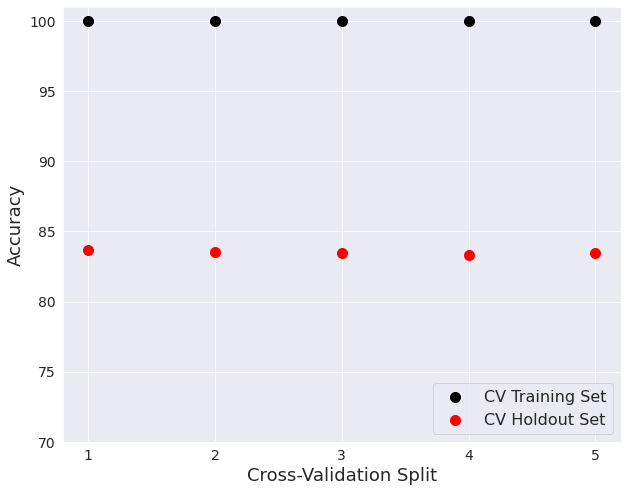

In [44]:
sns.set_style("darkgrid")

plt.figure(figsize=(10,8))

plt.scatter(range(1,6), 100*train_accs, s=100, c='k', label='CV Training Set')
plt.scatter(range(1,6), 100*holdout_accs, s=100, c='r', label='CV Holdout Set')

plt.xlabel("Cross-Validation Split", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.ylim(70,101)

plt.legend(loc=4,fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(range(1,6),fontsize=14)

plt.show()

In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
depths = range(1,31)

cv_accs = np.zeros((5, len(depths)))
cv_aucs = np.zeros((5, len(depths)))

i = 0
for train_index, test_index in kfold.split(X_train, y_train):
    X_train_train = X_train.iloc[train_index]
    y_train_train = y_train.iloc[train_index]
    X_holdout = X_train.iloc[test_index]
    y_holdout = y_train.iloc[test_index]
    
    j = 0
    for depth in depths:
        tree = DecisionTreeClassifier(max_depth=depth, random_state=332)
        tree.fit(X_train_train, y_train_train)

        cv_accs[i,j] = accuracy_score(y_holdout, tree.predict(X_holdout))
        cv_aucs[i,j] = roc_auc_score(y_holdout, tree.predict_proba(X_holdout)[:,1])
        j = j + 1
    i = i + 1

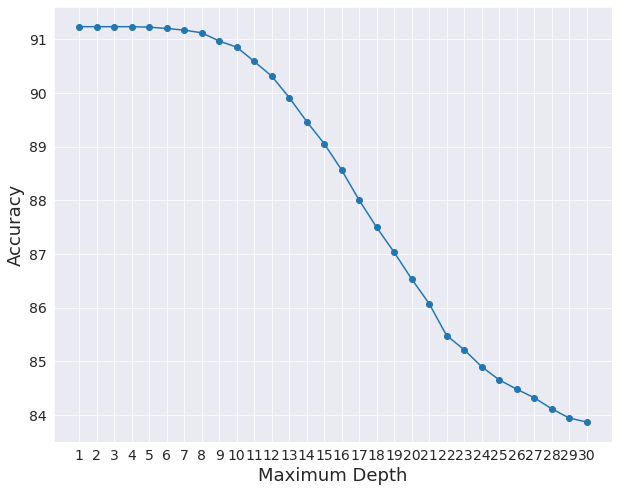

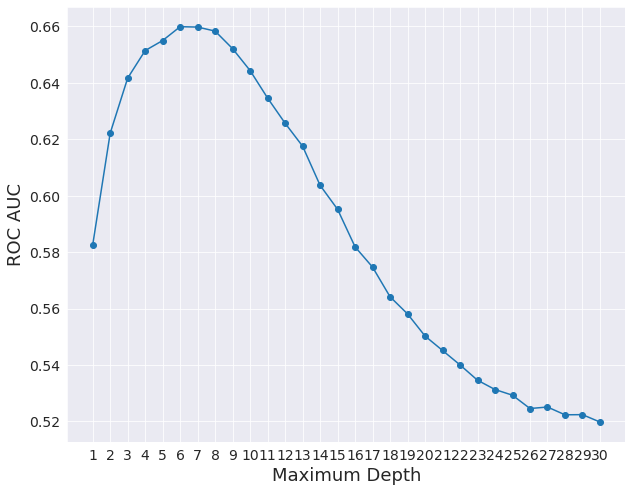

In [47]:
plt.figure(figsize=(10,8))


plt.plot(depths, 100*np.mean(cv_accs, axis=0), '-o')

plt.xlabel("Maximum Depth", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(depths,fontsize=14)

plt.show()

plt.figure(figsize=(10,8))


plt.plot(depths, np.mean(cv_aucs, axis=0), '-o')

plt.xlabel("Maximum Depth", fontsize=18)
plt.ylabel("ROC AUC", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(depths,fontsize=14)

plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
num_of_trees = [10, 50, 100, 250, 500, 1000, 1500]

cv_accs = np.zeros((5,len(num_of_trees)))
cv_aucs = np.zeros((5,len(num_of_trees)))

i = 0
for train_index, test_index in kfold.split(X_train, y_train):
    X_train_train = X_train.iloc[train_index]
    y_train_train = y_train.iloc[train_index]
    X_holdout = X_train.iloc[test_index]
    y_holdout = y_train.iloc[test_index]
    
    j = 0
    for num_trees in num_of_trees:
        acc_forest = RandomForestClassifier(max_depth=4,
                                            n_estimators=num_trees, 
                                            max_samples=200, 
                                            random_state=1341)
        auc_forest = RandomForestClassifier(max_depth=3,
                                            n_estimators=num_trees, 
                                            max_samples=200, 
                                            random_state=1341)
        
        acc_forest.fit(X_train_train, y_train_train)
        auc_forest.fit(X_train_train, y_train_train)

        cv_accs[i,j] = accuracy_score(y_holdout, acc_forest.predict(X_holdout))
        cv_aucs[i,j] = roc_auc_score(y_holdout, auc_forest.predict_proba(X_holdout)[:,1])
        j = j + 1
    i = i + 1

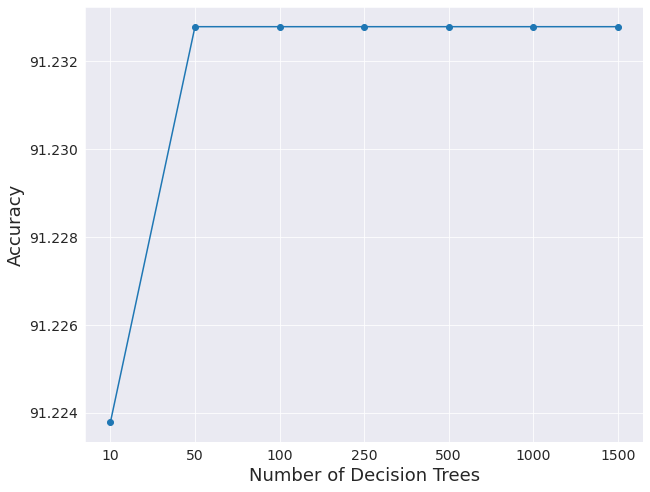

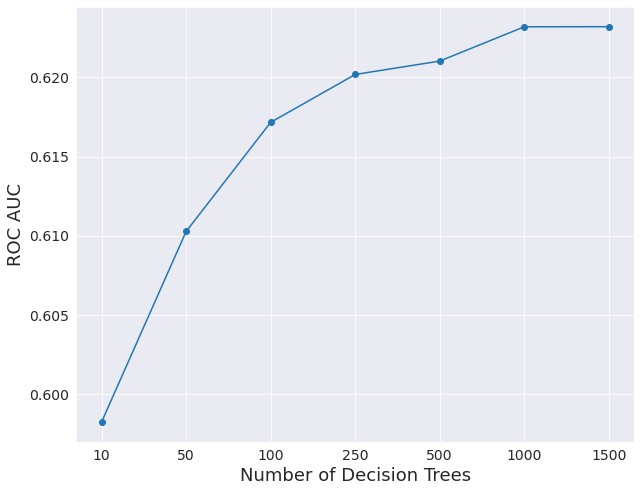

In [50]:
plt.figure(figsize=(10,8))


plt.plot(range(len(num_of_trees)), 100*np.mean(cv_accs, axis=0), '-o')

plt.xlabel("Number of Decision Trees", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(range(len(num_of_trees)), num_of_trees,fontsize=14)

plt.show()

plt.figure(figsize=(10,8))


plt.plot(range(len(num_of_trees)), np.mean(cv_aucs, axis=0), '-o')

plt.xlabel("Number of Decision Trees", fontsize=18)
plt.ylabel("ROC AUC", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(range(len(num_of_trees)), num_of_trees,fontsize=14)

plt.show()

Feature Importances

In [51]:
rf = RandomForestClassifier(max_depth=3,
                            n_estimators=500, 
                            max_samples=200)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_samples=200, n_estimators=500)

In [52]:
pd.DataFrame(rf.feature_importances_,
                index=X_train.columns,
                columns=['feature_importance_score']).sort_values('feature_importance_score')

,feature_importance_score
median_user_comment_score,0.040636
weekday,0.043967
num_user_comments,0.052140
max_user_comment_score,0.075222
median_user_submission_score,0.083114
max_user_submission_score,0.100166
account_age_in_days,0.117309
minutes_into_day,0.124979
title_length,0.144718
selftext_length,0.217750


Using your answer to the previous few questions use cross-validation to compare the accuracy and ROC AUC of:
- the single decision tree models from 5.
- the random forest models from 6.

In [54]:
from sklearn.ensemble import ExtraTreesClassifier

In [55]:
cv_accs = np.zeros((5,3))
cv_aucs = np.zeros((5,3))

acc_tree = DecisionTreeClassifier(max_depth=4)
auc_tree = DecisionTreeClassifier(max_depth=3)

acc_rf = RandomForestClassifier(max_depth=4, 
                                n_estimators=100,
                                max_samples=200, 
                                random_state=1341)
auc_rf = RandomForestClassifier(max_depth=3,
                                n_estimators=500,
                                max_samples=200,
                                random_state=1341)

acc_extra = ExtraTreesClassifier(max_depth=4, 
                                n_estimators=100,
                                max_samples=200, 
                                random_state=1341)
auc_extra = ExtraTreesClassifier(max_depth=3,
                                n_estimators=500,
                                max_samples=200,
                                random_state=1341)


i = 0
for train_index, test_index in kfold.split(X_train, y_train):
    X_train_train = X_train.iloc[train_index]
    y_train_train = y_train.iloc[train_index]
    X_holdout = X_train.iloc[test_index]
    y_holdout = y_train.iloc[test_index]
    
    acc_tree_clone = clone(acc_tree)
    auc_tree_clone = clone(auc_tree)
    acc_rf_clone = clone(acc_rf)
    auc_rf_clone = clone(auc_rf)
    acc_extra_clone = clone(acc_extra)
    auc_extra_clone = clone(auc_extra)
    
    acc_tree_clone.fit(X_train_train, y_train_train)
    auc_tree_clone.fit(X_train_train, y_train_train)
    acc_rf_clone.fit(X_train_train, y_train_train)
    auc_rf_clone.fit(X_train_train, y_train_train)
    acc_extra_clone.fit(X_train_train, y_train_train)
    auc_extra_clone.fit(X_train_train, y_train_train)
    
    cv_accs[i,0] = accuracy_score(y_holdout, acc_tree_clone.predict(X_holdout))
    cv_accs[i,1] = accuracy_score(y_holdout, acc_rf_clone.predict(X_holdout))
    cv_accs[i,2] = accuracy_score(y_holdout, acc_extra_clone.predict(X_holdout))
    
    cv_aucs[i,0] = roc_auc_score(y_holdout, auc_tree_clone.predict_proba(X_holdout)[:,1])
    cv_aucs[i,1] = roc_auc_score(y_holdout, auc_rf_clone.predict_proba(X_holdout)[:,1])
    cv_aucs[i,2] = roc_auc_score(y_holdout, auc_extra_clone.predict_proba(X_holdout)[:,1])
    
    i = i + 1

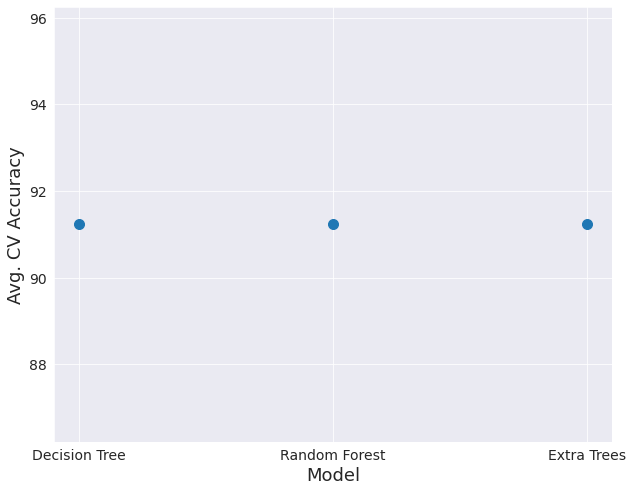

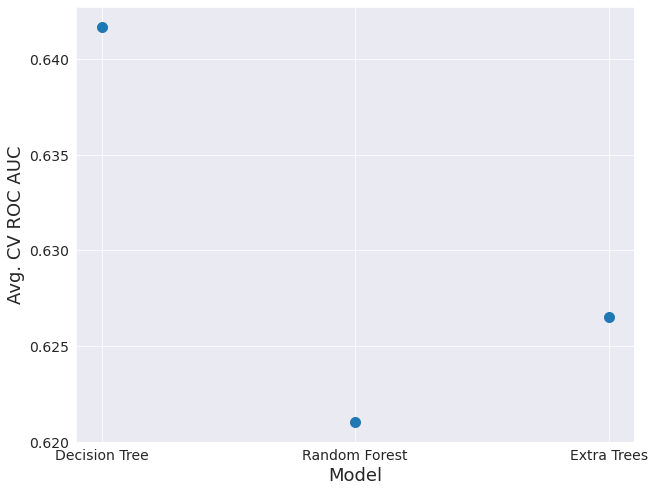

In [56]:
plt.figure(figsize=(10,8))

plt.scatter(range(3), 100*np.mean(cv_accs, axis=0), s=100)

plt.xlabel("Model", fontsize=18)
plt.ylabel("Avg. CV Accuracy", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(range(3), ['Decision Tree', 'Random Forest', 'Extra Trees'], fontsize=14)

plt.show()


plt.figure(figsize=(10,8))

plt.scatter(range(3), np.mean(cv_aucs, axis=0), s=100)

plt.xlabel("Model", fontsize=18)
plt.ylabel("Avg. CV ROC AUC", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(range(3), ['Decision Tree', 'Random Forest', 'Extra Trees'], fontsize=14)

plt.show()

A boosting classifier

In [57]:
# import the appropriate items here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [58]:
## We'll search from 1 to 50 weak learners
num_learners = range(1,51)

## Make an array to hold your cross validation results here
ada_aucs = np.zeros((5, len(num_learners)))

## fill in the code for a 5-fold cross-validation object here
kfold = StratifiedKFold(5, shuffle=True, random_state=413)


i=0
for train_index, test_index in kfold.split(X_train, y_train):
    # this will help you keep track of what kfold split you are on
    print(i)
    
    # this gets the training and holdout sets
    X_train_train = X_train.iloc[train_index]
    X_holdout = X_train.iloc[test_index]
    y_train_train = y_train.iloc[train_index]
    y_holdout = y_train.iloc[test_index]
    
    # here we loop through the different values for n_estimators
    for j in num_learners:
        # make the AdaBoostClassifier object here
        ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=j, learning_rate=1)
        
        # fit that object here
        ada.fit(X_train_train, y_train_train)
        
        # record the performance in your array here
        ada_aucs[i,j-1] = roc_auc_score(y_holdout, ada.predict_proba(X_holdout)[:,1])

    i = i + 1
    

0
1
2
3
4


5 is the number of estimators with highest mean CV ROC AUC.


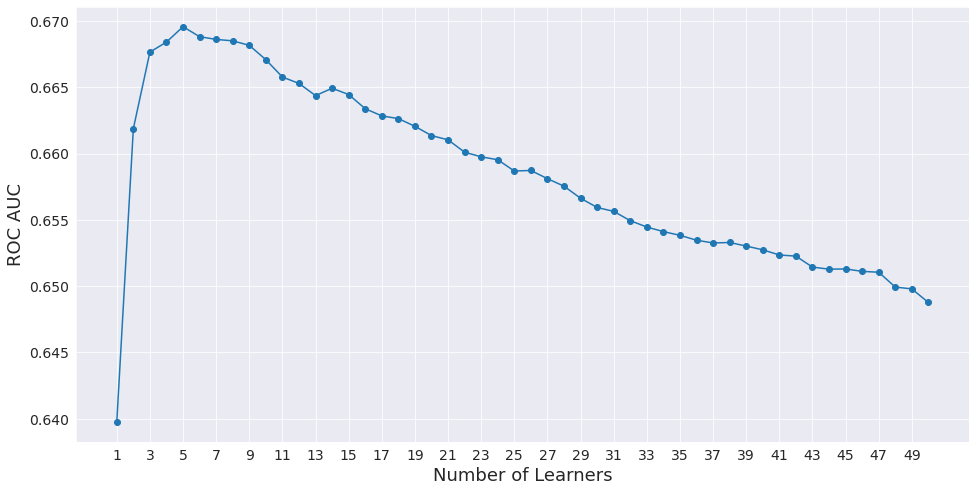

In [60]:
## choose the best value for n_estimators here
## according to your cross-validation results
print(num_learners[np.argmax(np.mean(ada_aucs, axis=0))],
      "is the number of estimators with highest mean CV ROC AUC.")

plt.figure(figsize=(16,8))

plt.plot(num_learners, np.mean(ada_aucs, axis=0), '-o')


plt.xlabel("Number of Learners", fontsize=18)
plt.ylabel("ROC AUC", fontsize=18)

plt.xticks(range(1,51,2), fontsize=14)
plt.yticks(fontsize=14)


#plt.ylim((.88,1))


plt.show()

Comparing different models

In [61]:
## import things here
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.base import clone

In [ ]:
## make performance metric holder arrays
rf_aucs = np.zeros(5)
svc_aucs = np.zeros(5)
ada_aucs = np.zeros(5)
vote_aucs = np.zeros(5)

## make the kfold object
kfold = StratifiedKFold(5, shuffle=True, random_state=134134)

## make base models
rf = RandomForestClassifier(n_estimators = 500, max_depth=4)
svc_pipe = Pipeline([('scale',StandardScaler()),
                         ('pca',PCA(10)),
                         ('svc',SVC(kernel='rbf', C=1, probability=True))])
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=46, learning_rate=1)
vote = VotingClassifier([('rf',RandomForestClassifier(n_estimators = 500, max_depth=4)),
                            ('svc',Pipeline([('scale',StandardScaler()),
                                         ('pca',PCA(10)),
                                         ('svc',SVC(kernel='rbf', C=1, probability=True))])),
                            ('ada',AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), 
                                                      n_estimators=46, 
                                                      learning_rate=1))],
                           voting='soft')

i=0
for train_index, test_index in kfold.split(X_train, y_train):
    # this will help you keep track of what kfold split you are on
    print(i)
    
    # this gets the training and holdout sets
    X_train_train = X_train.iloc[train_index]
    X_holdout = X_train.iloc[test_index]
    y_train_train = y_train.iloc[train_index]
    y_holdout = y_train.iloc[test_index]
    
    ## make model clones
    rf_clone = clone(rf)
    svc_pipe_clone = clone(svc_pipe)
    ada_clone = clone(ada)
    vote_clone = clone(vote)
    
    ## fit the models
    rf_clone.fit(X_train_train, y_train_train)
    svc_pipe_clone.fit(X_train_train, y_train_train)
    ada_clone.fit(X_train_train, y_train_train)
    vote_clone.fit(X_train_train, y_train_train)
    
    ## record the performances
    rf_aucs[i] = roc_auc_score(y_holdout, rf_clone.predict_proba(X_holdout)[:,1])
    svc_aucs[i] = roc_auc_score(y_holdout, svc_pipe_clone.predict_proba(X_holdout)[:,1])
    ada_aucs[i] = roc_auc_score(y_holdout, ada_clone.predict_proba(X_holdout)[:,1])
    vote_aucs[i] = roc_auc_score(y_holdout, vote_clone.predict_proba(X_holdout)[:,1])
    i = i + 1

0
